Import Libraries

In [1]:
import sys
!{sys.executable} -m pip install scikit-learn==1.5.2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import joblib
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier

# Evaluate Model Performance
from sklearn.model_selection import cross_val_score ,KFold,StratifiedKFold

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Resampling Techniques
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTETomek ,SMOTEENN

# Dimensionality Reduction Technique
from sklearn.decomposition import PCA

# Performance Metrics
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , roc_auc_score
from sklearn.metrics import roc_curve , classification_report

DATA EXPLORATION

Load data


In [3]:
df = pd.read_csv(r'C:\Users\Msi\OneDrive\Documents\NTI\AI-AU25\project 1(supervised)\data\Telco-Customer-Churn.csv')

In [4]:
df.shape

(7043, 21)

In [5]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Check Null values


In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Check dublicated

In [11]:
df.duplicated().sum()

np.int64(0)

Convert TotalCharges to numeric and check null values


In [12]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

-Here we see that the TotalCharges has 11 missing values

Handle null values

In [13]:
df=df.dropna(subset=["TotalCharges"])

In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Check dublication

In [15]:
df.duplicated().sum()

np.int64(0)

Data Visualization

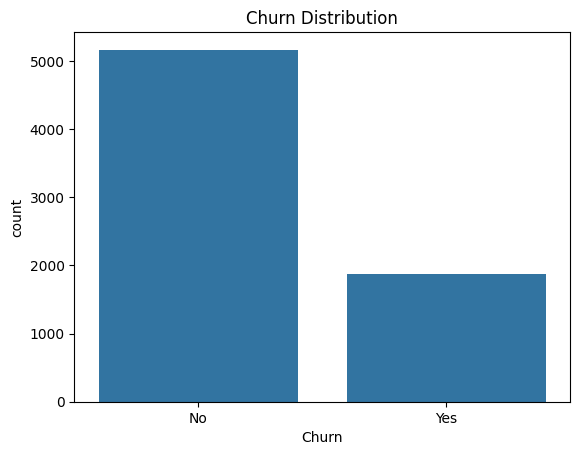

In [16]:
# Churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

In [17]:
# Value counts
print(df['Churn'].value_counts(normalize=True))

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64


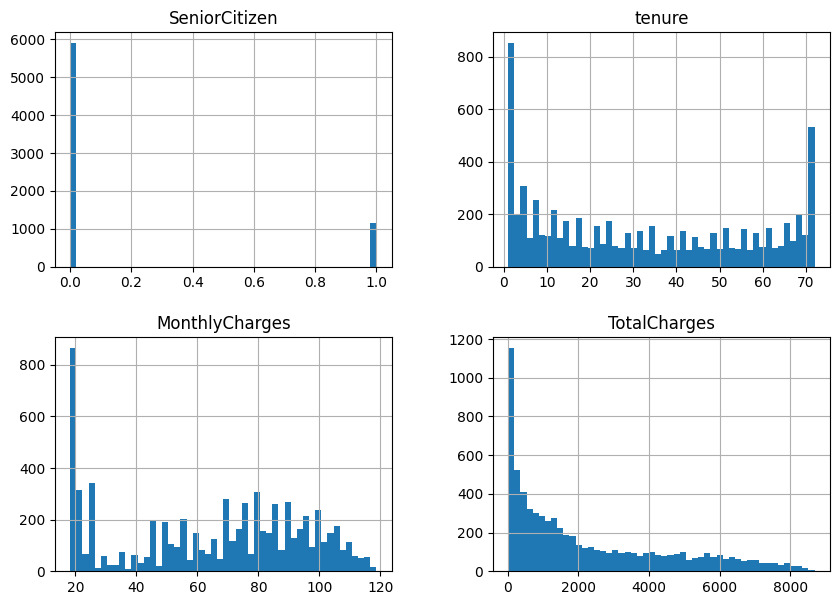

In [18]:
df.hist(bins=50,figsize=(10,7))
plt.show()

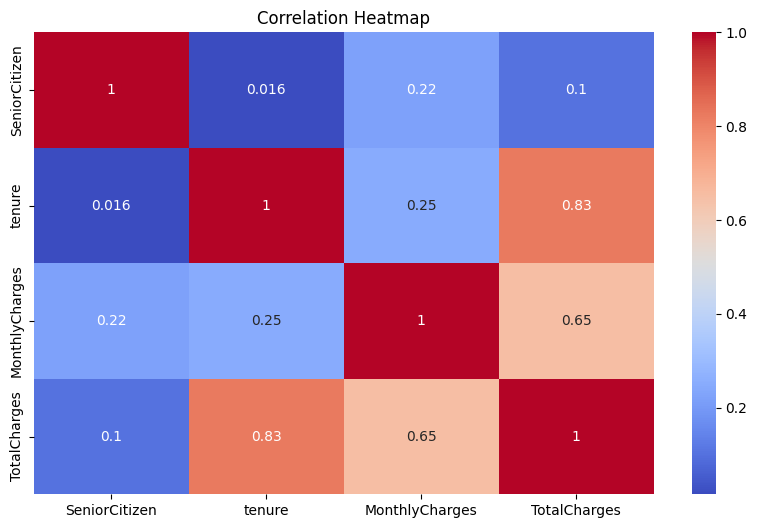

In [19]:
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: >

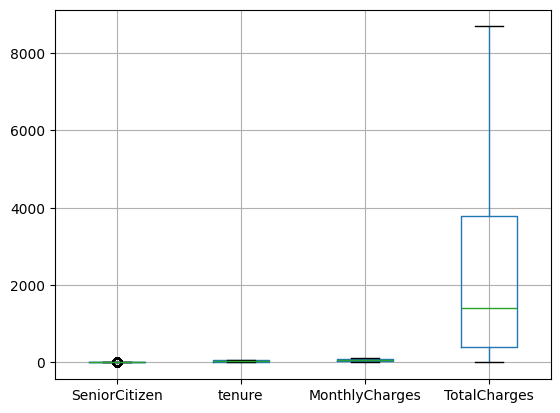

In [20]:
df.boxplot()

DATA Preprocessing

In [21]:
df['Churn'].replace({"no":0,"yes":1}, inplace=True)

C:\Users\Msi\AppData\Local\Temp\ipykernel_4032\2899353620.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].replace({"no":0,"yes":1}, inplace=True)


In [22]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [23]:
week_corr_cols = ['customerID', 'gender','PhoneService','MultipleLines','StreamingTV',
                  'Partner','StreamingMovies','OnlineBackup']
df.drop(columns=[col for col in week_corr_cols if col in df.columns], inplace=True)


In [24]:
df.shape

(7032, 13)

In [25]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.to_list()
num_cols.remove('SeniorCitizen')

In [26]:
cat_cols = df.select_dtypes(include='object').columns.to_list()
cat_cols = [col for col in cat_cols if col != 'Churn']

In [27]:
cat_cols

['Dependents',
 'InternetService',
 'OnlineSecurity',
 'DeviceProtection',
 'TechSupport',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [28]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [29]:
onehot_cols =['InternetService','OnlineSecurity','DeviceProtection','TechSupport','PaymentMethod']
binary_cols =['Dependents','Contract','PaperlessBilling']

In [30]:
# Numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

# OneHot pipeline (for nominal categorical features)
onehot_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoding', OneHotEncoder())
])

# Binary/Ordinal pipeline
binary_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('binary_encoding', OrdinalEncoder())
])

# Column transformer
processing = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('onehot', onehot_pipeline, onehot_cols),
    ('ordinal', binary_pipeline, binary_cols)
], remainder='passthrough')

processing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('onehot',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot_encoding',
                                                  OneHotEncoder())]),
                                 ['InternetService', 'OnlineSecurity',
                                  'DeviceProtection', 'TechSupport',
                                  'PaymentMethod']),
                                ('ordinal',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('binary_encoding',
                                                  OrdinalEncoder())]),
                                 ['Dependents', 'Contract',
                                  'PaperlessBilling'])])

Split Data into Train/Test

In [31]:
df['Churn'] = df['Churn'].replace({"No": 0, "Yes": 1, "no": 0, "yes": 1})
df['Churn'] = df['Churn'].astype(int)


C:\Users\Msi\AppData\Local\Temp\ipykernel_4032\4040668561.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({"No": 0, "Yes": 1, "no": 0, "yes": 1})


In [32]:
print(df['Churn'].unique())


[0 1]


In [33]:
# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5625, 12), (5625,), (1407, 12), (1407,))

In [35]:
X_train_cleaned = processing.fit_transform(X_train)
X_test_cleaned = processing.transform(X_test)

Resample Data before scaling

In [36]:
smote = SMOTE(random_state=12)
X_resampled, y_resampled = smote.fit_resample(X_train_cleaned, y_train)

scaling Data After Smote

In [37]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_resampled)
X_test_scaled=scaler.transform(X_test_cleaned)


In [38]:
print(X_train_scaled.shape, y_resampled.shape, X_test_scaled.shape, y_test.shape)

(8260, 23) (8260,) (1407, 23) (1407,)


Modeling

In [39]:
#logistic Regression
lo_reg =LogisticRegression()

# cross validation
kf =KFold(n_splits=5,shuffle=True,random_state=42)
cv_scores =cross_val_score(lo_reg,X_train_scaled,y_resampled,cv=kf,scoring='recall')
np.mean(cv_scores)

lo_reg.fit(X_train_scaled,y_resampled)

y_pred=lo_reg.predict(X_test_scaled)
print("\nRecall Score:", recall_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Recall Score: 0.786096256684492

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.80      0.74      0.75      1407



In [40]:
# KNN
knn=KNeighborsClassifier()

param_grid={
    'n_neighbors':[49,55,59,65],
    'p':[2,1]
}

knn_grid_search=GridSearchCV(estimator=knn,
                             param_grid=param_grid,
                             scoring='recall',
                             cv=5,
                             n_jobs=-1
)

knn_grid_search.fit(X_train_scaled, y_resampled)
print("\nBest RF Params:", knn_grid_search.best_params_)
print("Best Recall (CV):", knn_grid_search.best_score_)
y_pred = knn_grid_search.predict(X_test_scaled)
print("Recall (Test):", recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best RF Params: {'n_neighbors': 65, 'p': 2}
Best Recall (CV): 0.8874092009685229
Recall (Test): 0.8048128342245989
              precision    recall  f1-score   support

           0       0.90      0.64      0.75      1033
           1       0.45      0.80      0.57       374

    accuracy                           0.68      1407
   macro avg       0.67      0.72      0.66      1407
weighted avg       0.78      0.68      0.70      1407



In [41]:
# SVM
svm_clf=SVC(random_state=12)

param_grid={
    'C':[0.1,0.2,0.3,0.5],
    'kernel':['linear','poly','rbf','sigmoid'],
    'gamma':['scale','auto'],
}

svm_grid_search=GridSearchCV(estimator=svm_clf,
                             param_grid=param_grid,
                             scoring='recall',
                             cv=5,
                             n_jobs=-1)

svm_grid_search.fit(X_train_scaled, y_resampled)
print("\nBest RF Params:", svm_grid_search.best_params_)
print("Best Recall (CV):", svm_grid_search.best_score_)
y_pred = svm_grid_search.predict(X_test_scaled)
print("Recall (Test):", recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best RF Params: {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
Best Recall (CV): 0.8668280871670702
Recall (Test): 0.7967914438502673
              precision    recall  f1-score   support

           0       0.90      0.68      0.78      1033
           1       0.47      0.80      0.59       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.79      0.71      0.73      1407



In [42]:
# Desision Tree

tree_clf = DecisionTreeClassifier(class_weight='balanced')

param_grid={
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'min_weight_fraction_leaf':[0.0,0.1,0.2,0.3]
    }

tree_grid_search=GridSearchCV(estimator=tree_clf,
                             param_grid=param_grid,
                             scoring='recall',
                             cv=5,
                             n_jobs=-1)


tree_grid_search.fit(X_train_scaled, y_resampled)
print("\nBest RF Params:", tree_grid_search.best_params_)
print("Best Recall (CV):", tree_grid_search.best_score_)
y_pred = tree_grid_search.predict(X_test_scaled)
print("Recall (Test):", recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best RF Params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.3}
Best Recall (CV): 0.9261501210653753
Recall (Test): 0.8716577540106952
              precision    recall  f1-score   support

           0       0.92      0.55      0.69      1033
           1       0.41      0.87      0.56       374

    accuracy                           0.64      1407
   macro avg       0.67      0.71      0.63      1407
weighted avg       0.79      0.64      0.66      1407



In [43]:
# AdaBoost 
ada_best = AdaBoostClassifier(
    learning_rate=0.01,
    n_estimators=100,
    random_state=42
)

ada_best.fit(X_train_scaled, y_resampled)

# Get probabilities
y_probs = ada_best.predict_proba(X_test_scaled)[:, 1]

# Try different thresholds
best_threshold = 0.5
best_recall = 0
for thr in [0.5, 0.45, 0.4, 0.35, 0.3]:
    y_pred_thr = (y_probs >= thr).astype(int)
    recall = recall_score(y_test, y_pred_thr)
    if recall > best_recall:
        best_recall = recall
        best_threshold = thr

# Print threshold tuning result before final test output
print(f"Chosen Threshold: {best_threshold}")
print(f"Recall at chosen threshold (Test): {best_recall}")

# Final classification report
y_pred_final = (y_probs >= best_threshold).astype(int)
print("\nFinal Test Set Results:")
print(classification_report(y_test, y_pred_final))


c:\Users\Msi\miniconda3\envs\selenium\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Chosen Threshold: 0.3
Recall at chosen threshold (Test): 0.9518716577540107

Final Test Set Results:
              precision    recall  f1-score   support

           0       0.96      0.39      0.56      1033
           1       0.36      0.95      0.53       374

    accuracy                           0.54      1407
   macro avg       0.66      0.67      0.54      1407
weighted avg       0.80      0.54      0.55      1407



In [44]:
# RandomForest
rf_best = RandomForestClassifier(
    n_estimators=200,
    max_depth=7,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)

rf_best.fit(X_train_scaled, y_resampled)

# 2. Predict probabilities on test set
y_probs = rf_best.predict_proba(X_test_scaled)[:, 1]

# 3. Threshold tuning (0.5 → 0.1 step -0.01)
best_threshold = 0.5
best_recall = 0
thresholds = np.arange(0.5, 0.09, -0.01)  

for thr in thresholds:
    y_pred_thr = (y_probs >= thr).astype(int)
    recall = recall_score(y_test, y_pred_thr)
    if recall > best_recall:
        best_recall = recall
        best_threshold = thr

print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best Recall (Test): {best_recall:.4f}")

# 4. Final classification report using best threshold
y_pred_final = (y_probs >= best_threshold).astype(int)
print("\nFinal Test Set Results:")
print(classification_report(y_test, y_pred_final))


Best Threshold: 0.10
Best Recall (Test): 0.9599

Final Test Set Results:
              precision    recall  f1-score   support

           0       0.96      0.38      0.54      1033
           1       0.36      0.96      0.52       374

    accuracy                           0.53      1407
   macro avg       0.66      0.67      0.53      1407
weighted avg       0.80      0.53      0.54      1407



In [45]:
# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_best),  
        ('ada', ada_best), 
        ('logreg', lo_reg) 
    ],
    voting='soft'  
)

# Train the model on SMOTE + scaled data
voting_clf.fit(X_train_scaled, y_resampled)

# Predict probabilities
y_probs = voting_clf.predict_proba(X_test_scaled)[:, 1]

# Threshold tuning 
best_threshold = 0.5
best_recall = 0
for thr in np.arange(0.5, 0.09, -0.01):
    y_pred_thr = (y_probs >= thr).astype(int)
    recall = recall_score(y_test, y_pred_thr)
    if recall > best_recall:
        best_recall = recall
        best_threshold = thr

print(f"\n=== Voting Classifier ===")
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best Recall (Test): {best_recall:.4f}")

# Final evaluation at the best threshold
y_pred_final = (y_probs >= best_threshold).astype(int)
print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred_final))


c:\Users\Msi\miniconda3\envs\selenium\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



=== Voting Classifier ===
Best Threshold: 0.11
Best Recall (Test): 0.9866

Final Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.24      0.39      1033
           1       0.32      0.99      0.48       374

    accuracy                           0.44      1407
   macro avg       0.65      0.61      0.43      1407
weighted avg       0.80      0.44      0.41      1407



**"Soft voting in the Voting Classifier achieved the highest recall of 98%, making it the best-performing model."**


Save the model


In [46]:
import os
import joblib

print(f"Scikit-learn version when saving: {sklearn.__version__}")


# Create 'Model' directory inside your project if it doesn't exist
model_dir = os.path.join(os.getcwd(), "Model")
os.makedirs(model_dir, exist_ok=True)

# Save the trained voting classifier model
joblib.dump(voting_clf, os.path.join(model_dir, "telco_churn_voting_model.pkl"))
# Save the fitted scaler
joblib.dump(scaler, os.path.join(model_dir, "telco_churn_scaler.pkl"))
# Save the preprocessing pipeline
joblib.dump(processing, os.path.join(model_dir, "telco_churn_processing.pkl"))

print(f"Artifacts saved in: {model_dir}")


Scikit-learn version when saving: 1.5.2
Artifacts saved in: c:\Users\Msi\OneDrive\Documents\NTI\AI-AU25\project 1(supervised)\Model
